In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv(r'rents_test_interview.csv')

In [643]:
data.tail()

,rent_id,rent_created_date,user_name,city_name,country_name,car_id,rent_start,rent_end,rent_cost
9995,9996,2019-02-11 22:39:07,39059724f73a9969845dfe4146c5660e,65b9eea6,c20ad4d7,73278a4a86960eeb576a8fd4c9ec6997,2019-03-30,2019-04-02,4866.450536
9996,9997,2019-02-11 15:28:02,d81f9c1be2e08964bf9f24b15f0e4900,3c59dc04,45c48cce,a97da629b098b75c294dffdc3e463904,2019-03-02,2019-03-10,39958.729029
9997,9998,2019-02-11 17:35:56,b6d767d2f8ed5d21a44b0e5886680cb9,6ea9ab1b,e4da3b7f,5f93f983524def3dca464469d2cf9f3e,2019-03-02,2019-03-08,15222.872257
9998,9999,2019-02-11 22:48:31,01161aaa0b6d1345dd8fe4e481144d84,a5771bce,d3d94468,f0935e4cd5920aa6c7c996a5ee53a70f,2019-02-27,2019-03-01,9534.836708
9999,10000,2019-02-12 00:07:06,ad972f10e0800b49d76fed33a21f6698,6512bd43,d3d94468,73278a4a86960eeb576a8fd4c9ec6997,2019-02-21,2019-02-24,7226.612281


In [644]:
for col in ('rent_created_date','rent_start', 'rent_end'):
    data[col] = pd.to_datetime(data[col])

In [645]:
data = data.sort_values(by=['country_name', 'city_name', 'car_id', 'rent_start', 'rent_created_date']).reset_index(drop=True)

In [647]:
data['days_rent'] = (data['rent_end'] - data['rent_start'])/np.timedelta64(1, 'D')+1

In [648]:
data['lag_rent_end'] = data.groupby(['country_name', 'city_name', 'car_id'])['rent_end'].shift(1)
data['lag_create_date'] = data.groupby(['country_name', 'city_name', 'car_id'])['rent_created_date'].shift(1)


In [649]:
data['ind_error'] = data.apply(lambda x: 1 if x['rent_start'] < x['lag_rent_end'] else 0, axis=1)
data['ind_error_between'] = data.apply(lambda x: 1 if x['rent_end'] <= x['lag_rent_end'] else 0, axis=1)
data['ind_error_createDate'] = data.apply(lambda x: 1 if x['lag_create_date'] > x['rent_created_date'] else 0, axis=1)

In [650]:
data['cost_per_day'] = data['rent_cost']/data['days_rent']

In [622]:
data_old = data

In [651]:
data[data['ind_error']==1] 

,rent_id,rent_created_date,user_name,city_name,country_name,car_id,rent_start,rent_end,rent_cost,days_rent,lag_rent_end,lag_create_date,ind_error,ind_error_between,ind_error_createDate,cost_per_day
17,3090,2019-01-04 19:48:18,eb160de1de89d9058fcb0b968dbbbd68,03afdbd6,1679091c,2723d092b63885e0d7c260cc007e8b9d,2019-02-05,2019-02-10,21452.949739,6.0,2019-02-07,2019-01-03 09:56:56,1,0,0,3575.491623
19,9978,2019-02-11 03:34:23,428fca9bc1921c25c5121f9da7815cde,03afdbd6,1679091c,2723d092b63885e0d7c260cc007e8b9d,2019-02-15,2019-02-22,35120.758981,8.0,2019-02-16,2019-01-18 18:06:34,1,0,0,4390.094873
38,1012,2019-01-01 14:40:44,9c838d2e45b2ad1094d42f4ef36764f6,072b030b,1679091c,a97da629b098b75c294dffdc3e463904,2019-02-01,2019-02-03,5218.984082,3.0,2019-02-05,2019-01-26 15:01:34,1,1,1,1739.661361
58,4485,2019-01-21 07:46:32,918317b57931b6b7a7d29490fe5ec9f9,1679091c,1679091c,2723d092b63885e0d7c260cc007e8b9d,2019-03-05,2019-03-07,2576.669467,3.0,2019-03-06,2019-02-03 06:19:55,1,0,1,858.889822
69,2995,2019-02-11 15:04:50,7ef605fc8dba5425d6965fbd4c8fbe1f,17e62166,1679091c,5f93f983524def3dca464469d2cf9f3e,2019-03-28,2019-03-29,5033.950276,2.0,2019-04-01,2019-02-11 04:24:23,1,1,0,2516.975138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9822,4200,2019-01-09 13:56:30,550a141f12de6341fba65b0ad0433500,a684ecee,e4da3b7f,a97da629b098b75c294dffdc3e463904,2019-02-03,2019-02-05,8270.161453,3.0,2019-02-06,2019-01-25 06:03:50,1,1,1,2756.720484
9905,409,2019-01-18 08:29:45,019d385eb67632a7e958e23f24bd07d7,d2ddea18,e4da3b7f,73278a4a86960eeb576a8fd4c9ec6997,2019-02-04,2019-02-12,43701.517891,9.0,2019-02-05,2019-01-01 11:35:37,1,0,0,4855.724210
9938,9433,2019-01-19 11:41:09,26657d5ff9020d2abefe558796b99584,e369853d,e4da3b7f,2723d092b63885e0d7c260cc007e8b9d,2019-02-25,2019-03-02,6658.939710,6.0,2019-03-04,2019-01-08 17:27:29,1,1,0,1109.823285
9988,6129,2019-01-06 14:43:08,2838023a778dfaecdc212708f721b788,fc490ca4,e4da3b7f,5fd0b37cd7dbbb00f97ba6ce92bf5add,2019-01-26,2019-02-02,37841.048097,8.0,2019-01-27,2019-01-04 07:03:05,1,0,0,4730.131012


In [594]:
data.head(40)

,rent_id,rent_created_date,user_name,city_name,country_name,car_id,rent_start,rent_end,rent_cost,days_rent,lag_rent_end,lag_create_date,ind_error,ind_error_between,ind_error_createDate,cost_per_day
0,6528,2019-01-23 10:20:43,b2eb7349035754953b57a32e2841bda5,02e74f10,1679091c,2723d092b63885e0d7c260cc007e8b9d,2019-01-28,2019-01-30,10727.081851,3.0,NaT,NaT,0,0,0,3575.693950
1,9696,2019-01-30 03:16:47,7f39f8317fbdb1988ef4c628eba02591,02e74f10,1679091c,2723d092b63885e0d7c260cc007e8b9d,2019-03-01,2019-03-06,27728.211840,6.0,2019-01-30,2019-01-23 10:20:43,0,0,0,4621.368640
2,2000,2019-02-11 23:22:58,149e9677a5989fd342ae44213df68868,02e74f10,1679091c,5f93f983524def3dca464469d2cf9f3e,2019-03-04,2019-03-07,15677.718184,4.0,NaT,NaT,0,0,0,3919.429546
3,5718,2019-01-31 08:00:38,310dcbbf4cce62f762a2aaa148d556bd,02e74f10,1679091c,5fd0b37cd7dbbb00f97ba6ce92bf5add,2019-02-15,2019-02-17,11467.741787,3.0,NaT,NaT,0,0,0,3822.580596
4,5951,2019-02-09 18:52:48,1651cf0d2f737d7adeab84d339dbabd3,02e74f10,1679091c,65b9eea6e1cc6bb9f0cd2a47751a186f,2019-02-20,2019-02-23,12608.139556,4.0,NaT,NaT,0,0,0,3152.034889
5,5274,2019-01-12 14:38:47,e44fea3bec53bcea3b7513ccef5857ac,02e74f10,1679091c,698d51a19d8a121ce581499d7b701668,2019-01-23,2019-01-26,11350.944081,4.0,NaT,NaT,0,0,0,2837.736020
6,7479,2019-01-21 02:51:20,18d8042386b79e2c279fd162df0205c8,02e74f10,1679091c,698d51a19d8a121ce581499d7b701668,2019-02-11,2019-02-19,27018.454310,9.0,2019-01-26,2019-01-12 14:38:47,0,0,0,3002.050479
7,4242,2019-01-11 11:26:54,67f7fb873eaf29526a11a9b7ac33bfac,02e74f10,1679091c,698d51a19d8a121ce581499d7b701668,2019-02-20,2019-02-25,25565.833978,6.0,2019-02-19,2019-01-21 02:51:20,0,0,1,4260.972330
8,353,2019-01-15 23:15:50,aa942ab2bfa6ebda4840e7360ce6e7ef,02e74f10,1679091c,698d51a19d8a121ce581499d7b701668,2019-03-02,2019-03-07,18191.548234,6.0,2019-02-25,2019-01-11 11:26:54,0,0,0,3031.924706
9,7929,2019-02-09 01:01:07,57aeee35c98205091e18d1140e9f38cf,02e74f10,1679091c,698d51a19d8a121ce581499d7b701668,2019-03-14,2019-03-18,14598.041313,5.0,2019-03-07,2019-01-15 23:15:50,0,0,0,2919.608263


In [652]:
data['ind_del'] = 0 
data.columns

Index(['rent_id', 'rent_created_date', 'user_name', 'city_name',
       'country_name', 'car_id', 'rent_start', 'rent_end', 'rent_cost',
       'days_rent', 'lag_rent_end', 'lag_create_date', 'ind_error',
       'ind_error_between', 'ind_error_createDate', 'cost_per_day', 'ind_del'],
      dtype='object')

In [653]:
data.shape

(10000, 17)

In [654]:
#если более приоритетное бронирование внутри другого, то бьем менее приоритеное на два бронирования

In [655]:
n_row = len(data)
for row in range(n_row):
    if data.loc[row,'ind_error']==1 and data.loc[row, 'ind_error_between'] == 0 and data.loc[row, 'ind_error_createDate'] == 0:
        data.loc[row, 'rent_start'] = data.loc[row, 'lag_rent_end'] + np.timedelta64(1, 'D')
    if data.loc[row,'ind_error']==1 and data.loc[row, 'ind_error_between'] == 1 and data.loc[row, 'ind_error_createDate'] == 0:
        data.loc[row, 'ind_del'] = 1
    if data.loc[row,'ind_error']==1 and data.loc[row, 'ind_error_between'] == 1 and data.loc[row, 'ind_error_createDate'] == 1:
        start_0 = data.loc[row-1, 'rent_start']
        end_0 = data.loc[row-1, 'rent_end']
        data.loc[row-1, 'rent_end'] =[np.sum(data.loc[row, 'rent_start'] - np.timedelta64(1, 'D'))]
        new_days_rent = ((data.loc[row-1, 'rent_end'] - data.loc[row-1, 'rent_start'])/np.timedelta64(1, 'D')+1)
        #data.loc[len(data)+1] = list(randint(10, size = 17))
        data.loc[len(data)+1] = [np.sum(len(data)+1)] +\
        list(data.loc[row-1, ['rent_created_date', 'user_name', 'city_name', 'country_name', 'car_id']])+\
        list([data.loc[row, 'rent_end']+np.timedelta64(1, 'D'), end_0]) + \
        list([data.loc[row-1, 'rent_cost'], data.loc[row-1, 'days_rent']-new_days_rent])+\
        list(data.loc[row-1, ['lag_rent_end', 'lag_create_date', 'ind_error','ind_error_between', 'ind_error_createDate', 'cost_per_day','ind_del']])
        data.loc[row-1, 'days_rent'] = new_days_rent
    

In [599]:
data.head(40)

,rent_id,rent_created_date,user_name,city_name,country_name,car_id,rent_start,rent_end,rent_cost,days_rent,lag_rent_end,lag_create_date,ind_error,ind_error_between,ind_error_createDate,cost_per_day,ind_del
0,6528,2019-01-23 10:20:43,b2eb7349035754953b57a32e2841bda5,02e74f10,1679091c,2723d092b63885e0d7c260cc007e8b9d,2019-01-28,2019-01-30,10727.081851,3.0,NaT,NaT,0,0,0,3575.693950,0
1,9696,2019-01-30 03:16:47,7f39f8317fbdb1988ef4c628eba02591,02e74f10,1679091c,2723d092b63885e0d7c260cc007e8b9d,2019-03-01,2019-03-06,27728.211840,6.0,2019-01-30,2019-01-23 10:20:43,0,0,0,4621.368640,0
2,2000,2019-02-11 23:22:58,149e9677a5989fd342ae44213df68868,02e74f10,1679091c,5f93f983524def3dca464469d2cf9f3e,2019-03-04,2019-03-07,15677.718184,4.0,NaT,NaT,0,0,0,3919.429546,0
3,5718,2019-01-31 08:00:38,310dcbbf4cce62f762a2aaa148d556bd,02e74f10,1679091c,5fd0b37cd7dbbb00f97ba6ce92bf5add,2019-02-15,2019-02-17,11467.741787,3.0,NaT,NaT,0,0,0,3822.580596,0
4,5951,2019-02-09 18:52:48,1651cf0d2f737d7adeab84d339dbabd3,02e74f10,1679091c,65b9eea6e1cc6bb9f0cd2a47751a186f,2019-02-20,2019-02-23,12608.139556,4.0,NaT,NaT,0,0,0,3152.034889,0
5,5274,2019-01-12 14:38:47,e44fea3bec53bcea3b7513ccef5857ac,02e74f10,1679091c,698d51a19d8a121ce581499d7b701668,2019-01-23,2019-01-26,11350.944081,4.0,NaT,NaT,0,0,0,2837.736020,0
6,7479,2019-01-21 02:51:20,18d8042386b79e2c279fd162df0205c8,02e74f10,1679091c,698d51a19d8a121ce581499d7b701668,2019-02-11,2019-02-19,27018.454310,9.0,2019-01-26,2019-01-12 14:38:47,0,0,0,3002.050479,0
7,4242,2019-01-11 11:26:54,67f7fb873eaf29526a11a9b7ac33bfac,02e74f10,1679091c,698d51a19d8a121ce581499d7b701668,2019-02-20,2019-02-25,25565.833978,6.0,2019-02-19,2019-01-21 02:51:20,0,0,1,4260.972330,0
8,353,2019-01-15 23:15:50,aa942ab2bfa6ebda4840e7360ce6e7ef,02e74f10,1679091c,698d51a19d8a121ce581499d7b701668,2019-03-02,2019-03-07,18191.548234,6.0,2019-02-25,2019-01-11 11:26:54,0,0,0,3031.924706,0
9,7929,2019-02-09 01:01:07,57aeee35c98205091e18d1140e9f38cf,02e74f10,1679091c,698d51a19d8a121ce581499d7b701668,2019-03-14,2019-03-18,14598.041313,5.0,2019-03-07,2019-01-15 23:15:50,0,0,0,2919.608263,0


In [662]:
data.tail(45)

,rent_id,rent_created_date,user_name,city_name,country_name,car_id,rent_start,rent_end,rent_cost,days_rent,lag_rent_end,lag_create_date,ind_error,ind_error_between,ind_error_createDate,cost_per_day,ind_del,days_return,cost_return,new_rent_cost
10019,10019,2019-02-08 21:43:16,28dd2c7955ce926456240b2ff0100bde,9a115815,6512bd43,73278a4a86960eeb576a8fd4c9ec6997,2019-03-09,2019-03-09,7690.204767,6.0,NaT,NaT,0,0,0,961.275596,0,5.0,4806.377979,961.275596
10020,10020,2019-02-10 04:53:26,138bb0696595b338afbab333c555292a,a684ecee,6512bd43,a97da629b098b75c294dffdc3e463904,2019-03-07,2019-03-06,19664.241009,4.0,2019-02-09,2019-01-12 07:29:44,0,0,0,2809.177287,0,4.0,11236.709148,0.000000
10021,10021,2019-01-12 08:41:19,7ef605fc8dba5425d6965fbd4c8fbe1f,d9d4f495,6512bd43,f0935e4cd5920aa6c7c996a5ee53a70f,2019-02-28,2019-02-27,16200.394610,2.0,NaT,NaT,0,0,0,2025.049326,0,2.0,4050.098652,0.000000
10022,10022,2019-01-10 13:13:26,47d1e990583c9c67424d369f3414728e,e4da3b7f,6512bd43,a3c65c2974270fd093ee8a9bf8ae7d0b,2019-01-21,2019-01-21,26947.382425,4.0,NaT,NaT,0,0,0,4491.230404,0,3.0,13473.691213,4491.230404
10023,10023,2019-01-09 14:05:47,115f89503138416a242f40fb7d7f338e,ec895663,6512bd43,65b9eea6e1cc6bb9f0cd2a47751a186f,2019-02-20,2019-02-19,9280.489817,4.0,NaT,NaT,0,0,0,1325.784260,0,4.0,5303.137038,0.000000
10024,10024,2019-02-06 18:04:17,17d63b1625c816c22647a73e1482372b,093f65e0,8f14e45f,7f6ffaa6bb0b408017b62254211691b5,2019-03-13,2019-03-12,34565.381533,3.0,2019-02-28,2019-01-31 07:47:12,0,0,0,4937.911648,0,3.0,14813.734943,0.000000
10025,10025,2019-02-10 11:03:51,66f041e16a60928b05a7e228a89c3799,37693cfc,8f14e45f,2723d092b63885e0d7c260cc007e8b9d,2019-02-19,2019-02-19,14869.268736,4.0,NaT,NaT,0,0,0,2124.181248,0,3.0,6372.543744,2124.181248
10026,10026,2019-01-26 04:23:32,c0e190d8267e36708f955d7ab048990d,3c59dc04,8f14e45f,73278a4a86960eeb576a8fd4c9ec6997,2019-02-09,2019-02-08,10392.178045,4.0,2019-02-08,2019-01-17 09:26:46,1,1,0,1484.596864,1,4.0,5938.387454,0.000000
10027,10027,2019-01-19 14:56:41,1be3bc32e6564055d5ca3e5a354acbef,43ec517d,8f14e45f,5f93f983524def3dca464469d2cf9f3e,2019-02-27,2019-02-28,15542.314846,7.0,2019-02-03,2019-01-27 12:44:24,0,0,1,1726.923872,0,5.0,8634.619359,3453.847744
10028,10028,2019-02-07 23:59:04,bbcbff5c1f1ded46c25d28119a85c6c2,6ea9ab1b,8f14e45f,7f6ffaa6bb0b408017b62254211691b5,2019-03-02,2019-03-01,15389.038796,4.0,2019-02-17,2019-01-12 17:17:04,0,0,0,3077.807759,0,4.0,12311.231036,0.000000


In [661]:
for i in range(len(data)):
    if i!= 10000:
        if data.loc[i, 'ind_del'] == 1: 
            data.loc[i, 'days_return'] = data.loc[i, 'days_rent']
        else:
            data.loc[i, 'days_return'] = data.loc[i, 'days_rent'] - ((data.loc[i, 'rent_end'] - data.loc[i, 'rent_start'])/np.timedelta64(1, 'D')+1)

        data.loc[i, 'cost_return'] = data.loc[i, 'cost_per_day']*data.loc[i, 'days_return']
        data.loc[i, 'new_rent_cost'] = (data.loc[i, 'days_rent'] - data.loc[i, 'days_return'])*data.loc[i, 'cost_per_day']

In [658]:
#всего потерь
data['cost_return'].agg(['sum'])

sum    3.737775e+06
Name: cost_return, dtype: float64

In [632]:
data.groupby(['user_name'])['cost_return'].\
    agg(['sum']).\
    sort_values(by=['sum'], ascending=False).\
    head(10).\
    to_clipboard()

In [633]:
data[data['cost_return'] > 0]['rent_id'].count()

363

In [665]:
data.columns

Index(['rent_id', 'rent_created_date', 'user_name', 'city_name',
       'country_name', 'car_id', 'rent_start', 'rent_end', 'rent_cost',
       'days_rent', 'lag_rent_end', 'lag_create_date', 'ind_error',
       'ind_error_between', 'ind_error_createDate', 'cost_per_day', 'ind_del',
       'days_return', 'cost_return', 'new_rent_cost'],
      dtype='object')

In [731]:
#данные для отчета
data_report = pd.DataFrame(columns=['rent_id', 'user_name', 'city_name', 'country_name', 'car_id','rent_start', 'rent_end', 'cost_per_day', 'rent_day'])

    

In [732]:
for row in range(len(data)):
    if row != 10000:
        days = int((data.loc[row, 'rent_end'] - data.loc[row, 'rent_start'])/np.timedelta64(1, 'D')+1)
       # print(days)
        for day in range(days):
            #print('row = ', row, 'day = ', day, 'len data = ', len(data_report))
            data_report.loc[len(data_report)] = data.loc[row, ['rent_id', 'user_name', 'city_name', 'country_name', 'car_id','rent_start', 'rent_end', 'cost_per_day']]
            data_report.loc[len(data_report)-1, 'rent_day'] = data.loc[row,'rent_start'] + day*np.timedelta64(1, 'D')

In [733]:
data_report.shape

(53685, 9)

In [734]:
data_report.head()

,rent_id,user_name,city_name,country_name,car_id,rent_start,rent_end,cost_per_day,rent_day
0,6528,b2eb7349035754953b57a32e2841bda5,02e74f10,1679091c,2723d092b63885e0d7c260cc007e8b9d,2019-01-28,2019-01-30,3575.69395,2019-01-28 00:00:00
1,6528,b2eb7349035754953b57a32e2841bda5,02e74f10,1679091c,2723d092b63885e0d7c260cc007e8b9d,2019-01-28,2019-01-30,3575.69395,2019-01-29 00:00:00
2,6528,b2eb7349035754953b57a32e2841bda5,02e74f10,1679091c,2723d092b63885e0d7c260cc007e8b9d,2019-01-28,2019-01-30,3575.69395,2019-01-30 00:00:00
3,9696,7f39f8317fbdb1988ef4c628eba02591,02e74f10,1679091c,2723d092b63885e0d7c260cc007e8b9d,2019-03-01,2019-03-06,4621.36864,2019-03-01 00:00:00
4,9696,7f39f8317fbdb1988ef4c628eba02591,02e74f10,1679091c,2723d092b63885e0d7c260cc007e8b9d,2019-03-01,2019-03-06,4621.36864,2019-03-02 00:00:00


In [773]:
aggs = {
    'cost_per_day': ['sum'],
    'user_name': ['nunique']
}

In [774]:
data_report_daily_cost = data_report.groupby(['rent_day', 'country_name', 'car_id']).\
    agg(aggs).\
    rename(columns={'sum': 'total_cost', 'nunique':'active user'}).\
    reset_index()



In [776]:
data_report_daily_cost.to_clipboard()

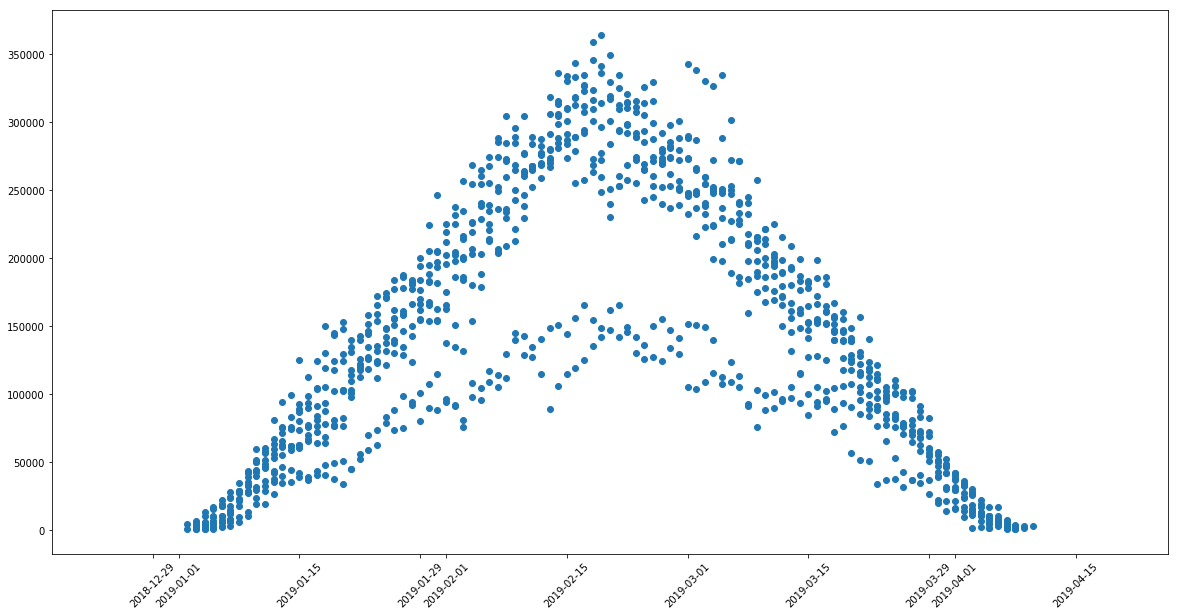

In [751]:
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.scatter(data_report_daily_cost['rent_day'], data_report_daily_cost['total_cost'])